In [1]:
import csv

# Weather Data Source

The data that has been analysed have been cited from http://ncdc.noaa.gov/cdo-web/datatools vide order number 1263442. The data downloaded was in the form of a CSV containing weather records for a period of 10 years for 3 stations: USW00014733 (BUF), IN022023000 (DEL), IN024141500 (CCU).

The example format for the downloaded CSV file have been cited underneath.

```
"STATION","NAME","LATITUDE","LONGITUDE","ELEVATION","DATE","AWND","PRCP","SNOW","SNWD","TAVG","TMAX","TMIN","WT01","WT02","WT03","WT04","WT05","WT06","WT07","WT08","WT09","WT11","WT13","WT14","WT15","WT16","WT17","WT18","WT21","WT22"
"USW00014733","BUFFALO NIAGARA INTERNATIONAL NY US","42.9408","-78.7358","218.2","2008-01-01","5.1","8.9","58.0","25.0",,"1.7","-5.0","    1","    1",,,,,,,,,,,,"    1",,"    1",,"USW00014733","BUFFALO NIAGARA INTERNATIONAL NY US","42.9408","-78.7358","218.2","2008-01-02","5.6","0.0","5.0","76.0",,"-5.0","-10.6","    1",,,,,,,,,,"    1",,,,,"    1",,
```

In [2]:
filePath = './1263442.csv'
csvFile = open(filePath, mode = 'r', encoding = 'utf-8')

In [3]:
weatherDataReader = csv.DictReader(csvFile)

# Weather Analysis

The quarterly mean temperature of an area is calculated over a 3 months period of time and is the mean of the highest recorded temperature and the lowest recorded temperature for the given period of time. In the metric system temperature is expressed in °C (degree celsius).

The annual precipitation of an area is calculated over a time interval of 1 year and is the total sum of the daily recorded count of precipitation received. In the metric system precipitation is expressed in mm
(millimetres).

Daily records of weather data for a particular station can be used to calculate the quarterly mean temperature and annual precipitation of an area.

The labels of the different quarters.

In [4]:
meanPeriods = ['{}Q{}'.format(year, quarter) for year in range(2008, 2018) 
               for quarter in range(1, 5)]

In [5]:
months = {}
for meanPeriod in meanPeriods:
    (year, quarter) = meanPeriod.split('Q')
    quarter = int(quarter)
    months[meanPeriod] = ['%s-%02d' % (year, month) for month in range((quarter - 1) * 3 + 1, quarter * 3 + 1)]

List of weather stations.

In [6]:
stations = {
    'USW00014733': 'BUFFALO NIAGARA INTERNATIONAL NY US',
    'IN022023000': 'NEW DELHI PALAM IN', 
    'IN024141500': 'CALCUTTA DUM DUM IN'
}

In [7]:
weatherRecords = []

for stationCode in stations:

    for weatherRecord in weatherDataReader:
        if weatherRecord['STATION'] != stationCode:
            break
        
        weatherRecords.append({
            'station': weatherRecord['STATION'],
            'date': weatherRecord['DATE'],
            'tmax': weatherRecord['TMAX'],
            'tmin': weatherRecord['TMIN'],
            'tavg': weatherRecord['TAVG']
        })

Quarterly city temperatures of different stations. Will find the mean temperature of each quarter.

In [8]:
quarterlyCityTemperatures = {}

for stationCode in stations:
    quarterlyCityTemperatures[stationCode] = {}
    for meanPeriod in meanPeriods:
        currentMonths = months[meanPeriod]
        
        tempMax = -1000.00
        tempMin = 1000.00
        
        quarterlyRecords = []
        for month in currentMonths:
            quarterlyRecords += list(filter(
                lambda record: record['date'].startswith(month), weatherRecords
            ))
            
        tempMax = -9999.99
        tempMin = 1000.00
        for record in quarterlyRecords:
            try: 
                if float(record['tmax']) > tempMax:
                    tempMax = float(record['tmax'])
            except ValueError:
                pass
            try:
                if float(record['tavg']) > tempMax:
                    tempMax = float(record['tavg'])
            except ValueError:
                pass
            try:
                if float(record['tmin']) < tempMin:
                    tempMin = float(record['tmin'])
            except ValueError:
                pass
            try:
                if float(record['tavg']) < tempMin:
                    tempMin = float(record['tavg'])
            except ValueError:
                pass
            
        tempMean = (tempMax + tempMin) / 2
        quarterlyCityTemperatures[stationCode][meanPeriod] = tempMean

.

In [12]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.rcParams['figure.figsize'] = [6, 5]

# Weather Graph

<IPython.core.display.Javascript object>


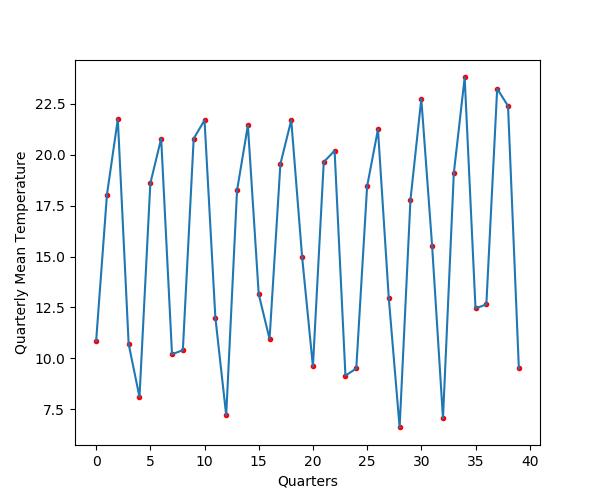

Station:  USW00014733
2008Q1-4: 0-4, 2008Q1-4: 4-8, 2008Q1-4: 8-12, 2008Q1-4: 12-16, 2008Q1-4: 16-20, 2008Q1-4: 20-24, 2008Q1-4: 24-28, 2008Q1-4: 28-32, 2008Q1-4: 32-36, 2008Q1-4: 36-40, 





<IPython.core.display.Javascript object>


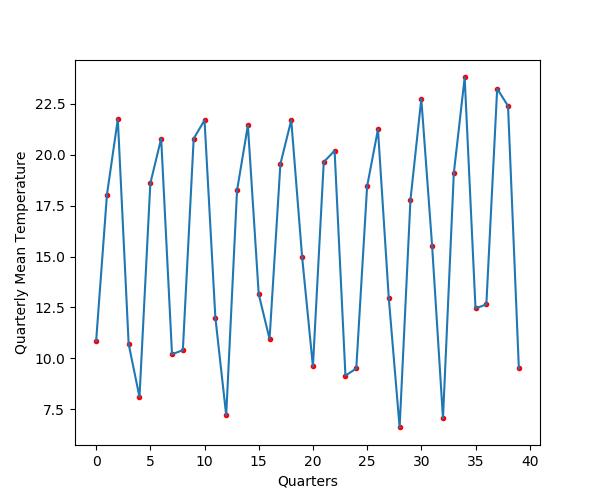

Station:  IN022023000
2008Q1-4: 0-4, 2008Q1-4: 4-8, 2008Q1-4: 8-12, 2008Q1-4: 12-16, 2008Q1-4: 16-20, 2008Q1-4: 20-24, 2008Q1-4: 24-28, 2008Q1-4: 28-32, 2008Q1-4: 32-36, 2008Q1-4: 36-40, 





<IPython.core.display.Javascript object>


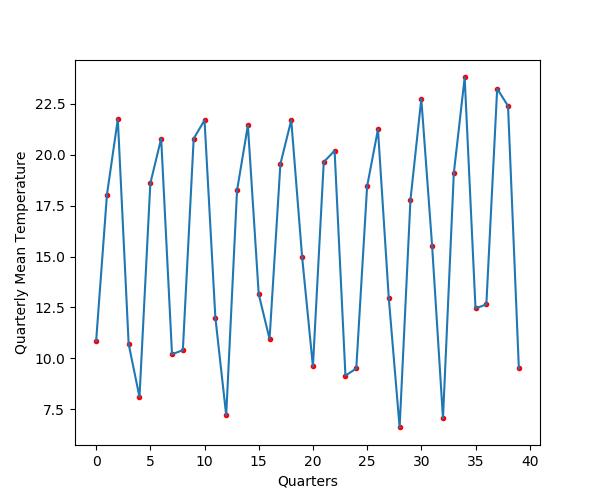

Station:  IN024141500
2008Q1-4: 0-4, 2008Q1-4: 4-8, 2008Q1-4: 8-12, 2008Q1-4: 12-16, 2008Q1-4: 16-20, 2008Q1-4: 20-24, 2008Q1-4: 24-28, 2008Q1-4: 28-32, 2008Q1-4: 32-36, 2008Q1-4: 36-40, 





In [13]:
for stationCode in stations:
    pyplot.figure()
    X = range(len(quarterlyCityTemperatures[stationCode].keys()))
    y = quarterlyCityTemperatures[stationCode].values()
    
    print('Station: ', stationCode)
    for index in X:
        if index % 4 == 0:
            print('%dQ1-4: %d-%d' % (2008 + (index % 4), index, index + 4), end = ', ')
    print('\n\n\n')
    
    pyplot.plot(X, y, 'ro', markersize=3)
    pyplot.plot(X, y)
    pyplot.ylabel('Quarterly Mean Temperature')
    pyplot.xlabel('Quarters')

@selfLink: https://github.com/swghosh/weather-graph-ppt-temp/blob/master/WeatherAnalysis.ipynb